In [31]:
# import zipfile
# import os
# # Path to the zip file

# # Directory to extract the files to
# extract_to_directory = './data/'

# # Unzipping the file
# for file in os.listdir('./data'):
#     with zipfile.ZipFile(os.path.join('./data/', file), 'r') as zip_ref:
#         zip_ref.extractall(extract_to_directory)

# print("File unzipped successfully!")

In [58]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
#garbage collector
import gc
gc.enable()

In [33]:
#contains information about product aisles
aisles = pd.read_csv('data/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [34]:
#contains information about product departments
dept = pd.read_csv('data/departments.csv')
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [35]:
order_products_prior = pd.read_csv('data/order_products__prior.csv')
order_products_prior
#Here same number for order_id represents multiple products ordered in that single order?

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [36]:
order_products_train = pd.read_csv('data/order_products__train.csv')
order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [37]:
orders = pd.read_csv('data/orders.csv')
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [38]:
# contains information about the product and in which aisle and which department it is in
products = pd.read_csv('data/products.csv')
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


Doubts
If order_id is unique identifier for each order, oka user suppose user_id = 1 multiple times order chesthe appudu each time different order ids generate avtai kada, so appudu order_id ane unknown number meeda manam predictions ela generate chestam?

In [40]:
# Function to describe the stats of the data
def get_stats(df):
    columns = df.columns
    dtypes = df.dtypes
    non_null_cnt = df.count()
    null_cnt = df.isnull().sum(axis = 0)
    missing_pct = (null_cnt/non_null_cnt)*100
    no_unique_values = [len(df[col].unique()) for col in df.columns]
    unique_values = [df[col].unique() for col in df.columns]
    
    summary = pd.DataFrame({
        'columns': columns,
        'dtypes': dtypes,
        'Non_null_values': non_null_cnt,
        'Null_values': null_cnt,
        'Missing_percentage': missing_pct,
        'Number_of_unique_values':no_unique_values,
        'Unique_values': unique_values
    })
    
    return summary
    
    

In [41]:
get_stats(aisles)

,columns,dtypes,Non_null_values,Null_values,Missing_percentage,Number_of_unique_values,Unique_values
aisle_id,aisle_id,int64,134,0,0.0,134,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
aisle,aisle,object,134,0,0.0,134,"[prepared soups salads, specialty cheeses, ene..."


In [42]:
get_stats(dept)

,columns,dtypes,Non_null_values,Null_values,Missing_percentage,Number_of_unique_values,Unique_values
department_id,department_id,int64,21,0,0.0,21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
department,department,object,21,0,0.0,21,"[frozen, other, bakery, produce, alcohol, inte..."


In [43]:
get_stats(order_products_prior)

,columns,dtypes,Non_null_values,Null_values,Missing_percentage,Number_of_unique_values,Unique_values
order_id,order_id,int64,32434489,0,0.0,3214874,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1..."
product_id,product_id,int64,32434489,0,0.0,49677,"[33120, 28985, 9327, 45918, 30035, 17794, 4014..."
add_to_cart_order,add_to_cart_order,int64,32434489,0,0.0,145,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
reordered,reordered,int64,32434489,0,0.0,2,"[1, 0]"


In [44]:
get_stats(order_products_train)

,columns,dtypes,Non_null_values,Null_values,Missing_percentage,Number_of_unique_values,Unique_values
order_id,order_id,int64,1384617,0,0.0,131209,"[1, 36, 38, 96, 98, 112, 170, 218, 226, 349, 3..."
product_id,product_id,int64,1384617,0,0.0,39123,"[49302, 11109, 10246, 49683, 43633, 13176, 472..."
add_to_cart_order,add_to_cart_order,int64,1384617,0,0.0,80,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
reordered,reordered,int64,1384617,0,0.0,2,"[1, 0]"


In [45]:
get_stats(orders)

,columns,dtypes,Non_null_values,Null_values,Missing_percentage,Number_of_unique_values,Unique_values
order_id,order_id,int64,3421083,0,0.000000,3421083,"[2539329, 2398795, 473747, 2254736, 431534, 33..."
user_id,user_id,int64,3421083,0,0.000000,206209,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
eval_set,eval_set,object,3421083,0,0.000000,3,"[prior, train, test]"
order_number,order_number,int64,3421083,0,0.000000,100,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
order_dow,order_dow,int64,3421083,0,0.000000,7,"[2, 3, 4, 1, 5, 0, 6]"
order_hour_of_day,order_hour_of_day,int64,3421083,0,0.000000,24,"[8, 7, 12, 15, 9, 14, 16, 11, 10, 19, 18, 17, ..."
days_since_prior_order,days_since_prior_order,float64,3214874,206209,6.414217,32,"[nan, 15.0, 21.0, 29.0, 28.0, 19.0, 20.0, 14.0..."


In [46]:
get_stats(products)

,columns,dtypes,Non_null_values,Null_values,Missing_percentage,Number_of_unique_values,Unique_values
product_id,product_id,int64,49688,0,0.0,49688,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
product_name,product_name,object,49688,0,0.0,49688,"[Chocolate Sandwich Cookies, All-Seasons Salt,..."
aisle_id,aisle_id,int64,49688,0,0.0,134,"[61, 104, 94, 38, 5, 11, 98, 116, 120, 115, 31..."
department_id,department_id,int64,49688,0,0.0,21,"[19, 13, 7, 1, 11, 16, 17, 18, 12, 9, 8, 14, 1..."


<Axes: >

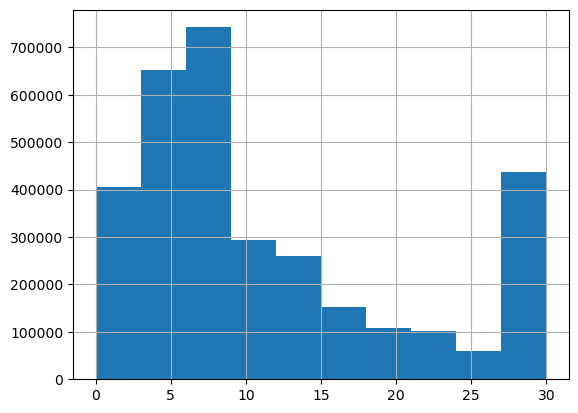

In [55]:
orders['days_since_prior_order'].hist()

In [ ]:
# Chaning the eval_set column in orders dataset
orders['eval_set'] = orders['eval_set'].replace({'prior' : 0, 'train' : 1, 'test': 2})
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(30)
#Here the intuition for filling the NA values with 30 is 30 days represents approximately one month. If a customer has no prior order history, it might be reasonable to assume that their next order will occur in about a month.

In [ ]:
# the test dataset, we have to predict what products will they reorder?
orders[orders['eval_set'] == 2 ]

Exploratory Data Analysis

In [63]:
#For each user_id, how many orders they are putting?
orders.groupby(['user_id'])['order_number'].count()

user_id
1         11
2         15
3         13
4          6
5          5
          ..
206205     4
206206    68
206207    17
206208    50
206209    14
Name: order_number, Length: 206209, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='order_number', ylabel='Count'>

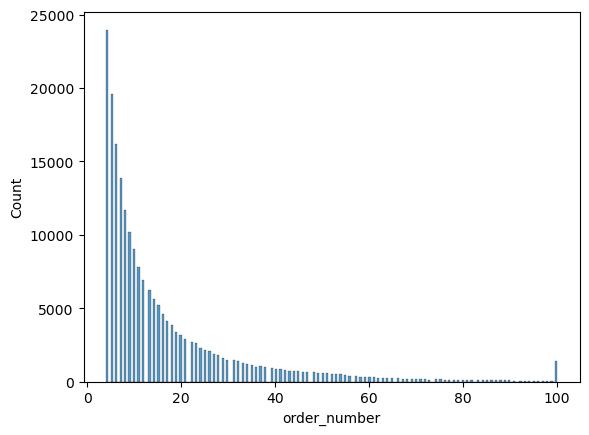

In [59]:
sns.histplot(data = orders.groupby(['user_id'])['order_number'].count())